In [ ]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
incidents_timing = pd.read_csv('state_date_level.csv')
injury_data = pd.read_csv('injury_data.csv')
us_population = pd.read_csv('us_population.csv')
gun_laws = pd.read_csv('gun_laws.csv')
incidents_details = pd.read_csv('incidents_details.csv')
shooter_data = pd.read_csv('shooter_data.csv')

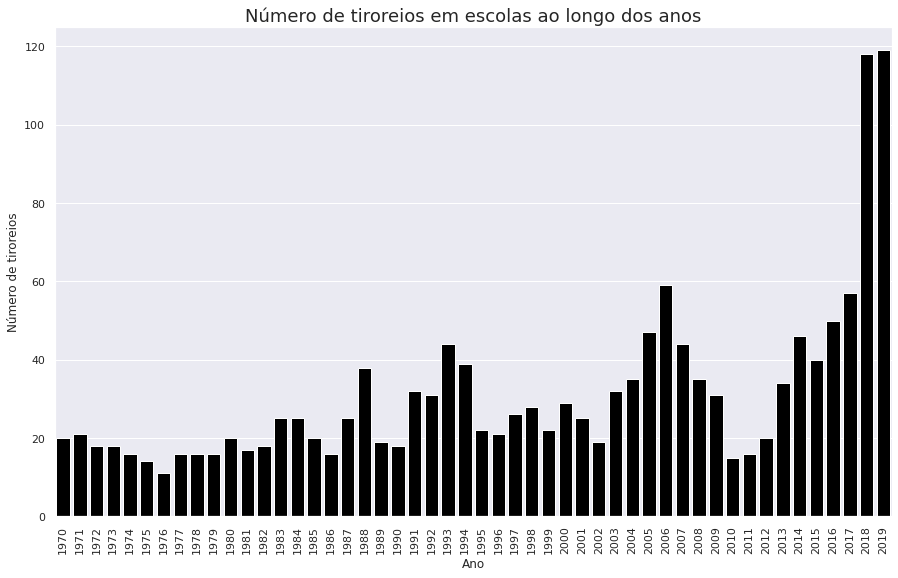

In [ ]:
available_years = []
number_shootings = []

for year in range(1970, 2020):
  available_years.append(year)
  number_shootings.append(len(incidents_timing.loc[incidents_timing['Date'].str.contains(str(year))]))

shootings_per_year = pd.DataFrame({"year": available_years, "number_shootings": number_shootings})

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

sns.barplot(
    x = shootings_per_year['year'],
    y = shootings_per_year['number_shootings'],
    color='black'
)

plt.title("Número de tiroreios em escolas ao longo dos anos", fontsize=18)
plt.xlabel('Ano')
plt.ylabel('Número de tiroreios')
plt.xticks(rotation=90)

plt.show()

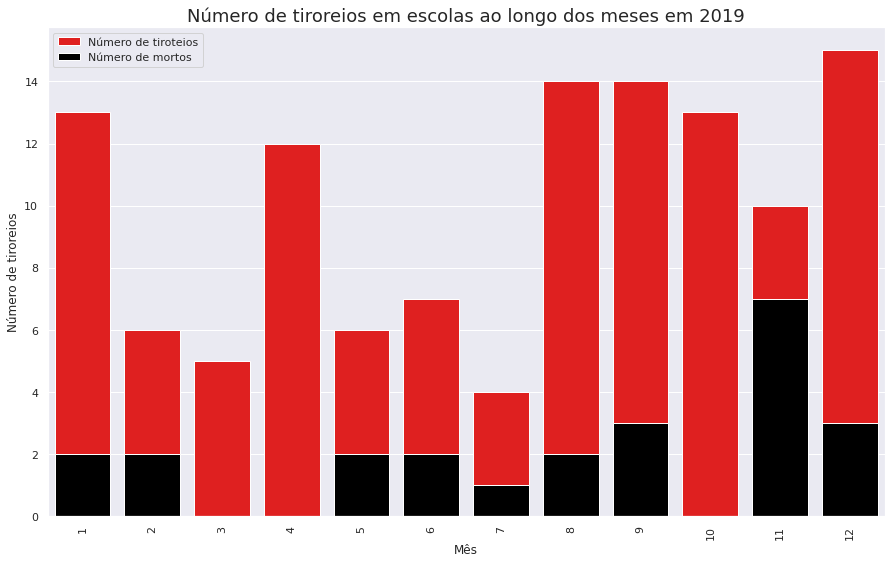

In [ ]:
available_months = []
number_shootings_per_month = []
total_dead_per_month = []

for month in range(1, 13):
  available_months.append(month)
  monthtly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-" + str(month).zfill(2))]
  number_shootings_per_month.append(len(monthtly_incidents))

  number_killed_per_month = 0
  for incident_id in monthtly_incidents['Incident_ID']:
    monthtly_incidents = injury_data.loc[injury_data['Incident_ID'] == incident_id]
    number_killed_per_month += len(monthtly_incidents.loc[monthtly_incidents['injury'] == 'Fatal'])

  total_dead_per_month.append(number_killed_per_month)

shootings_per_year = pd.DataFrame(
  {
    "month": available_months,
    "number_shootings": number_shootings_per_month,
    "total_dead": total_dead_per_month
  })

matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

sns.barplot(x='month', y='number_shootings', color='red',
                      data=shootings_per_year, label='Número de tiroteios')
sns.barplot(x='month', y='total_dead', color='black',
                      data=shootings_per_year, label='Número de mortos')

plt.title("Número de tiroreios em escolas ao longo dos meses em 2019", fontsize=18)
plt.xlabel('Mês')
plt.ylabel('Número de tiroreios')
plt.xticks(rotation=90)
plt.legend()

plt.show()

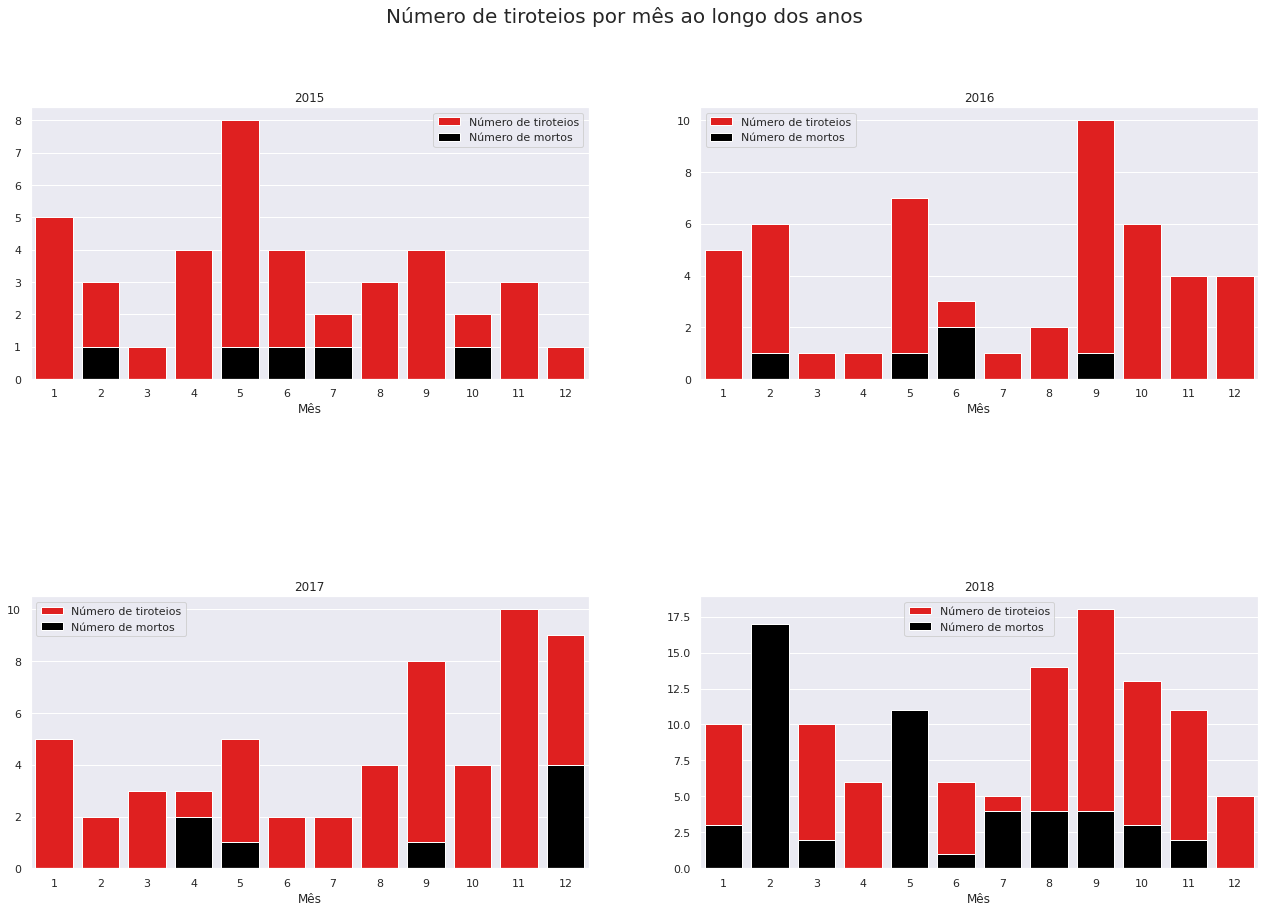

In [ ]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Número de tiroteios por mês ao longo dos anos', fontsize=20)

available_years = [2015, 2016, 2017, 2018]

for year in range(2015, 2019):
  number_shootings_per_month = []
  total_dead_per_month = []

  ax = fig.add_subplot(2,2,year-2014)

  for month in range(1, 13):
    number_killed_per_month = 0
    monthtly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains(str(year) + "-" + str(month).zfill(2))]
    number_shootings_per_month.append(len(monthtly_incidents))
    for incident_id in monthtly_incidents['Incident_ID']:
      monthtly_incidents = injury_data.loc[injury_data['Incident_ID'] == incident_id]
      number_killed_per_month += len(monthtly_incidents.loc[monthtly_incidents['injury'] == 'Fatal'])

    total_dead_per_month.append(number_killed_per_month)

  shootings_per_year = pd.DataFrame(
  {
    "month": available_months,
    "number_shootings": number_shootings_per_month,
    "total_dead": total_dead_per_month
  })

  sns.barplot(x='month', y='number_shootings', color='red',
                        data=shootings_per_year, label='Número de tiroteios')
  sns.barplot(x='month', y='total_dead', color='black',
                        data=shootings_per_year, label='Número de mortos')

  plt.title(year)
  plt.xlabel('Mês')
  plt.ylabel('')
  plt.legend()

plt.show()

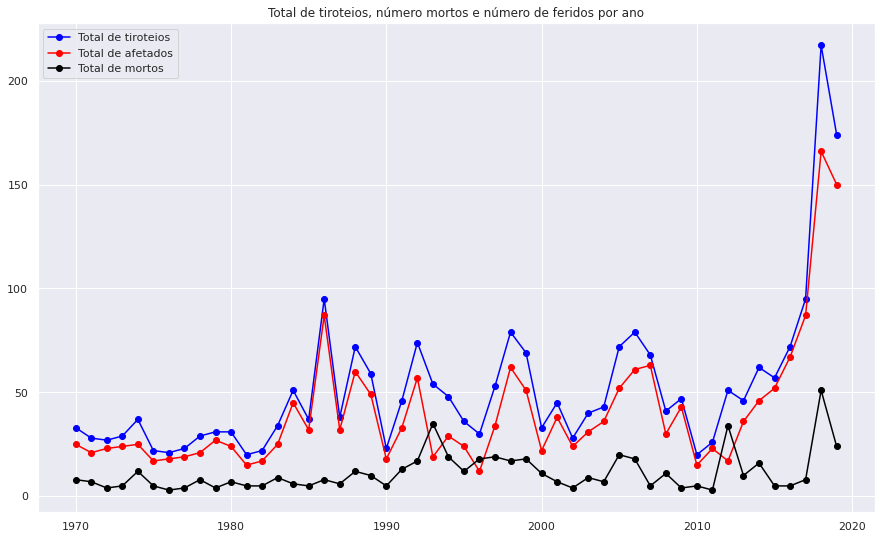

In [ ]:
available_years = []
incidents_per_year = []
injured_per_year = []
mudered_per_year = []

injuries_year = pd.merge(injury_data, incidents_timing[['Date', 'Incident_ID']], on='Incident_ID')

for year in range(1970, 2020):
  available_years.append(year)

  yearly_incidents = injuries_year.loc[injuries_year['Date'].str.contains(str(year))]
  incidents_per_year.append(len(yearly_incidents))

  injured_per_year.append(len(yearly_incidents.loc[yearly_incidents['injury'] != 'Fatal']))
  mudered_per_year.append(len(yearly_incidents.loc[yearly_incidents['injury'] == 'Fatal']))

shootings_per_year = pd.DataFrame(
  {
    "year": available_years,
    "number_incidents": incidents_per_year,
    "number_injured": injured_per_year,
    "number_murdered": mudered_per_year
  })

f, ax = plt.subplots()
ax.plot(shootings_per_year['year'], shootings_per_year['number_incidents'], label='Total de tiroteios', color = 'blue',  marker='o')
ax.plot(shootings_per_year['year'], shootings_per_year['number_injured'], label="Total de afetados", color = 'red',  marker='o')
ax.plot(shootings_per_year['year'], shootings_per_year['number_murdered'], label="Total de mortos", color = 'black', marker='o')

ax.set_title('Total de tiroteios, número mortos e número de feridos por ano')

plt.legend()
plt.show()

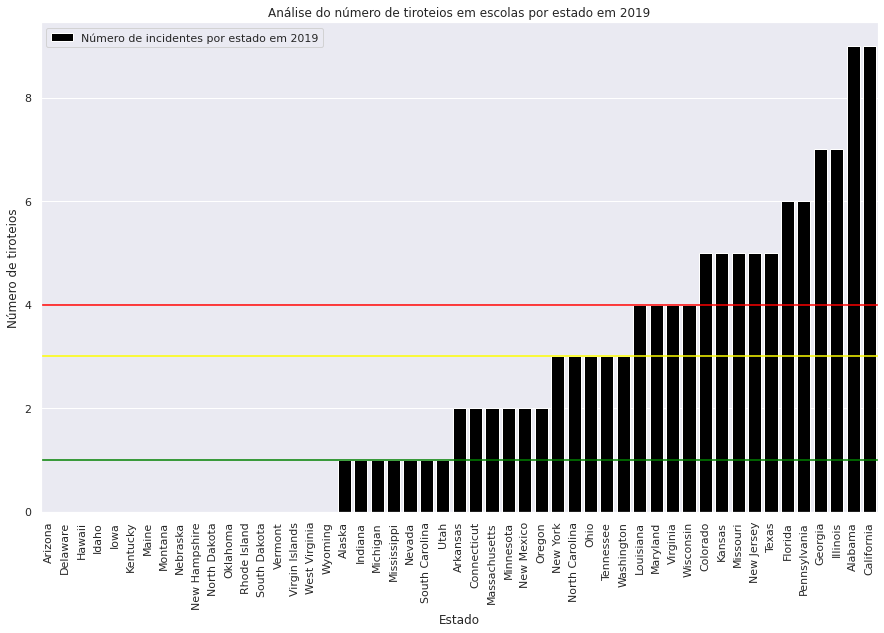

In [ ]:
states = set(incidents_timing['State'])
states.remove("High")

incidents_by_state = []
low_profile_states = set()
high_profile_states = set()

yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-")]

for state in states:
  incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))
  if(incidents_by_state[-1] < 1): low_profile_states.add(state)
  if(incidents_by_state[-1] > 3): high_profile_states.add(state)

total_incidents_by_state = incidents_by_state

ranked_incidents, ranked_states = (list(t) for t in zip(*sorted(zip(incidents_by_state, states))))

sns.barplot(x = ranked_states, y = ranked_incidents, color='black', label='Número de incidentes por estado em 2019')

plt.axhline(y=1, color='green', linestyle='-')
plt.axhline(y=3, color='yellow', linestyle='-')
plt.axhline(y=4, color='red', linestyle='-')

plt.title("Análise do número de tiroteios em escolas por estado em 2019")
plt.xlabel('Estado')
plt.ylabel('Número de tiroteios')
plt.yticks(np.arange(0, 10, 2))
plt.xticks(rotation=90)
plt.legend()
plt.show()

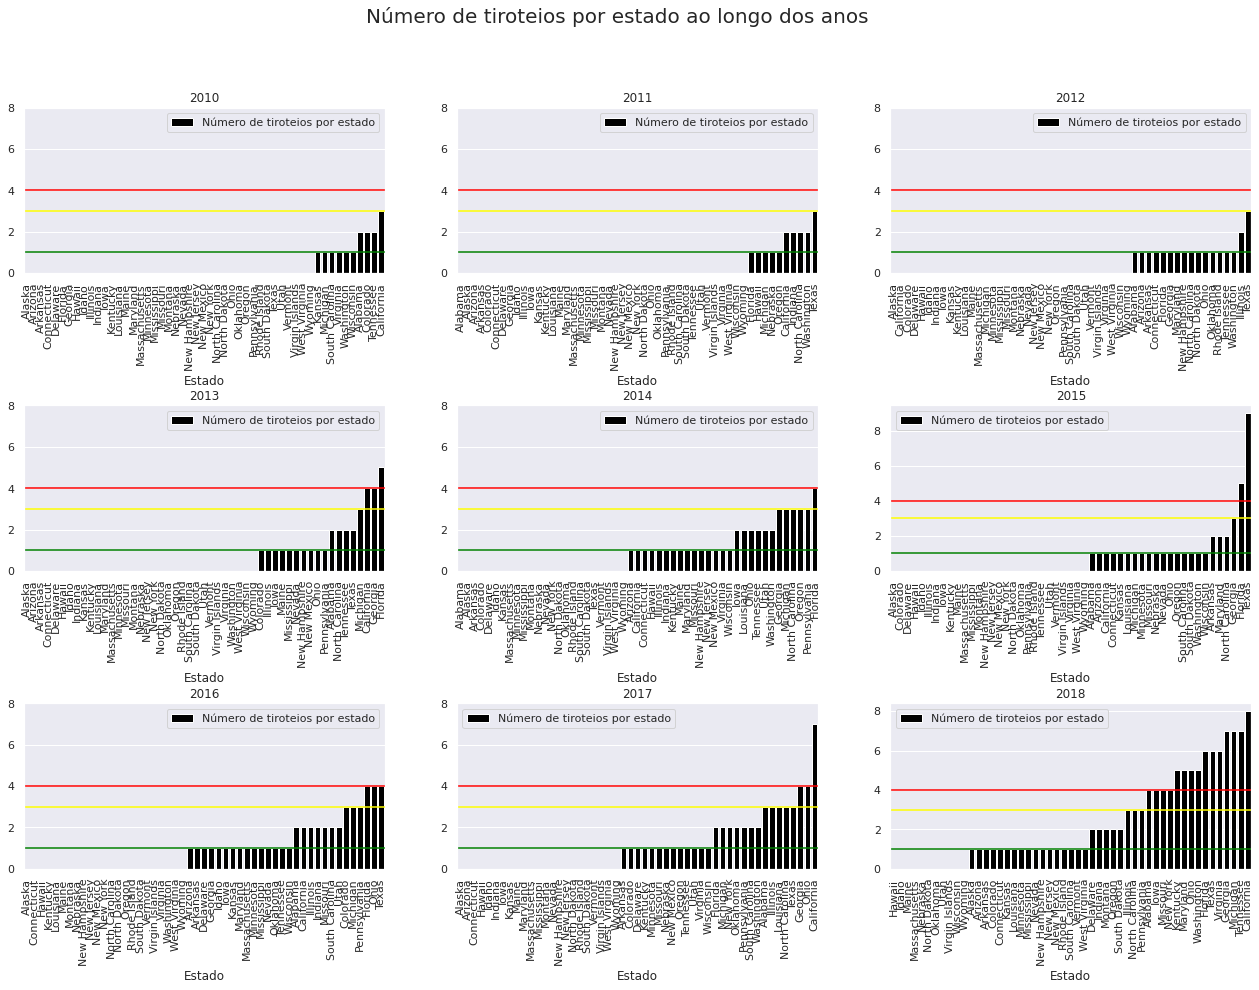

In [ ]:
fig = plt.figure(figsize=(22, 14))
fig.subplots_adjust(hspace=0.8, wspace=0.2)
fig.suptitle('Número de tiroteios por estado ao longo dos anos', fontsize=20)

available_years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for year in range(2010, 2019):
  ax = fig.add_subplot(3,3,year-2009)

  incidents_by_state = []
  yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains(str(year) + "-")]

  for index, state in enumerate(states):
    incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))
    if(incidents_by_state[-1] < 1): low_profile_states.add(state)
    if(incidents_by_state[-1] > 3): high_profile_states.add(state)
    total_incidents_by_state[index] += incidents_by_state[-1]

  ranked_incidents, ranked_states = (list(t) for t in zip(*sorted(zip(incidents_by_state, states))))

  sns.barplot(x = ranked_states, y = ranked_incidents, color='black', label='Número de tiroteios por estado')

  plt.axhline(y=1, color='green', linestyle='-')
  plt.axhline(y=3, color='yellow', linestyle='-')
  plt.axhline(y=4, color='red', linestyle='-')

  plt.yticks(np.arange(0, 10, 2))
  plt.xticks(rotation=90)
  plt.title(year)
  plt.xlabel('Estado')
  plt.ylabel('')
  plt.legend()

plt.show()

In [ ]:
print(f'\nEstados com números baixos de tiroteios em escolas:\n{sorted([x for x in low_profile_states if (x not in high_profile_states)])}')
print(f'\nEstados com números altos de tiroteios em escolas:\n{sorted(high_profile_states)}')

ranked_incidents, ranked_states = (list(t) for t in zip(*sorted(zip(total_incidents_by_state, states))))

print('\n-----------------------\n\nNúmero de tiroteios em escolas por estado durante o período informado:\n')
for index in range(len(ranked_states)):
  print(f'{ranked_states[index]} : {ranked_incidents[index]}')


Estados com números baixos de tiroteios em escolas:
['Alaska', 'Arizona', 'Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Maine', 'Massachusetts', 'Minnesota', 'Mississippi', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico', 'North Carolina', 'North Dakota', 'Oklahoma', 'Oregon', 'Rhode Island', 'South Carolina', 'South Dakota', 'Utah', 'Vermont', 'Virgin Islands', 'West Virginia', 'Wyoming']

Estados com números altos de tiroteios em escolas:
['Alabama', 'California', 'Colorado', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maryland', 'Michigan', 'Missouri', 'New Jersey', 'New York', 'Ohio', 'Pennsylvania', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wisconsin']

-----------------------

Número de tiroteios em escolas por estado durante o período informado:

Virgin Islands : 0
Wyoming : 0
Idaho : 1
North Dakota : 1
Vermont : 1
West Virginia : 1
Alaska : 2
Hawaii : 2
Maine : 2
Montana : 2
Rhode Island : 2
Massac

In [ ]:
states_demographics = us_population['POPESTIMATE2019']
list_states = sorted(list(states))

incidents_demographics = []

for index in range(len(list_states)):
  state_demographics = 0
  if(total_incidents_by_state[index] != 0):
    state_demographics = (states_demographics[index] / total_incidents_by_state[index]).round(2)
  incidents_demographics.append(state_demographics)

ranked_demographics, ranked_states = (list(t) for t in zip(*sorted(zip(incidents_demographics, list_states))))

print('Densidade do número de tiroteios em escolas considerando a população de cada estado:\n')

for index in range(len(ranked_states)):
  print(f'{ranked_states[index]} : {ranked_demographics[index]}')

Densidade do número de tiroteios em escolas considerando a população de cada estado:

Florida : 0
Rhode Island : 0
South Carolina : 28631.38
Wyoming : 41339.93
Alaska : 52253.21
Illinois : 52560.74
New Jersey : 71563.74
Nevada : 80600.33
Vermont : 91598.8
Connecticut : 118842.9
Tennessee : 126379.86
Maryland : 149356.89
West Virginia : 162922.45
Idaho : 176984.0
Virgin Islands : 207996.33
Kentucky : 224101.08
Delaware : 243441.0
Maine : 244673.37
Louisiana : 248204.06
Colorado : 261760.73
Mississippi : 268553.9
Ohio : 381031.0
New Hampshire : 385019.5
Kansas : 394383.75
Arizona : 428159.82
Oregon : 439663.44
Iowa : 517863.0
Nebraska : 534389.0
South Dakota : 572079.33
New York : 698943.0
Alabama : 700455.0
Pennsylvania : 702956.17
Missouri : 744037.25
Massachusetts : 755710.0
Montana : 1022904.67
North Dakota : 1048808.4
Washington : 1522978.6
Utah : 1526099.0
Minnesota : 1664476.17
New Mexico : 2220547.5
Hawaii : 2654355.75
Arkansas : 3017804.0
Michigan : 3446251.5
North Carolina : 38

A partir dos dados acima, pode-se observar os estados e a quantidade de tiroteios escolares em cada um, mas um fator importante é o tamanho e população de cada estado, já que nota-se que estados menos populosos tem menos incidentes.

Tendo isso vem vista selecionei os melhores representantes para altos e baixos números de tiroteios, considerando que os estados abaixo tem uma população parecida e incidentes muito divergentes:

```
BAIXO NÚMERO DE INCIDENTES

Massachusetts (6,893 mi habitantes, 3 incidentes - 1 a cada 2.297 mi)
Oklahoma (3,957 mi habitantes, 4 incidentes - 1 a cada 989.250)
Mississipi (2,976 mi habitantes, 4 incidentes - 1 a cada 744.000)
```

```
ALTO NÚMERO DE INCIDENTES

Alabama (4,903 mi habitantes, 24 incidentes - 1 a cada 204.291)
Georgia (3,714 mi habitantes, 30 incidentes - 1 a cada 123.800)
Washington (692.683 habitantes, 17 incidentes - 1 a cada 40.746)
```

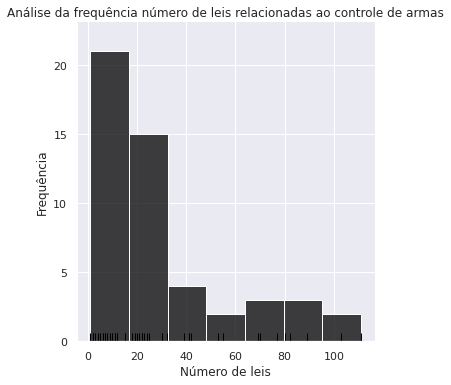

In [ ]:
recent_gun_laws = gun_laws.loc[gun_laws['year'] == 2020]
total_laws = list(recent_gun_laws['lawtotal'])
states = recent_gun_laws['state']

sns.displot(total_laws, rug=True, color='black')

plt.title("Análise da frequência número de leis relacionadas ao controle de armas")
plt.xlabel('Número de leis')
plt.ylabel('Frequência')
plt.show()

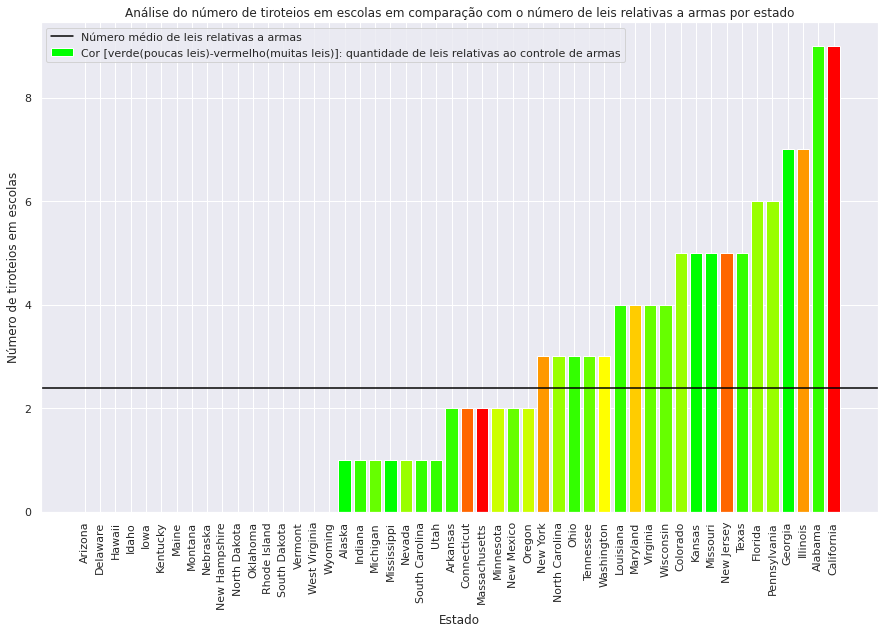

In [ ]:
bar_gradient = []
incidents_by_state = []
gradient_colors = ['#00ff00', '#33ff00', '#66ff00', '#99ff00', '#ccff00', '#ffff00', '#ffcC00', '#ff9900', '#ff6600', '#ff3300', '#ff0000', '#ff0000']
yearly_incidents = incidents_timing.loc[incidents_timing['Date'].str.contains("2019-")]

for index, state in enumerate(states):
  bar_gradient.append(gradient_colors[int(total_laws[index]/10)])
  incidents_by_state.append(len(yearly_incidents.loc[incidents_timing['State'].str.contains(state)]))

ranked_incidents, ranked_states, ranked_colors = (list(t) for t in zip(*sorted(zip(incidents_by_state, states, bar_gradient))))

plt.bar(ranked_states, ranked_incidents, color=ranked_colors, label='Cor [verde(poucas leis)-vermelho(muitas leis)]: quantidade de leis relativas ao controle de armas')

plt.axhline(y=np.array(ranked_incidents).mean(), color='black', linestyle='-', label='Número médio de leis relativas a armas')

plt.title("Análise do número de tiroteios em escolas em comparação com o número de leis relativas a armas por estado")
plt.xlabel('Estado')
plt.ylabel('Número de tiroteios em escolas')
plt.xticks(rotation=90)
plt.legend()
plt.show()

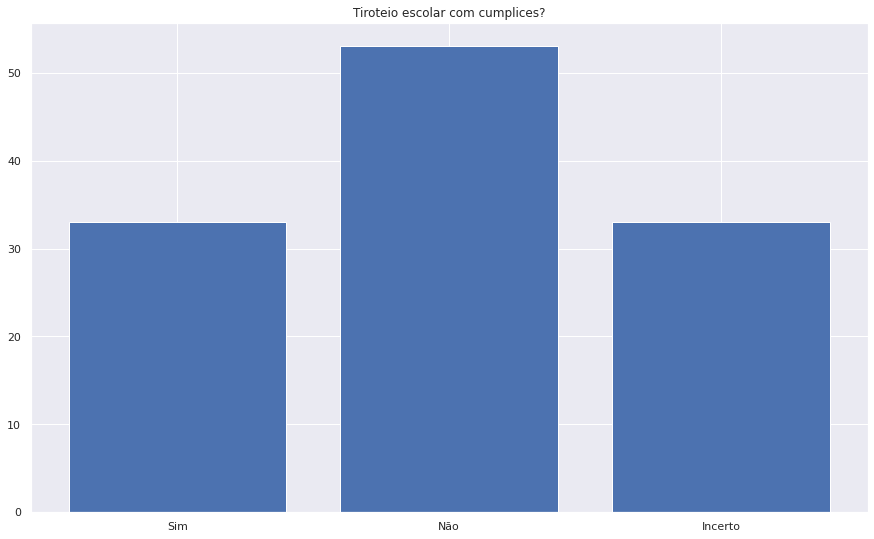

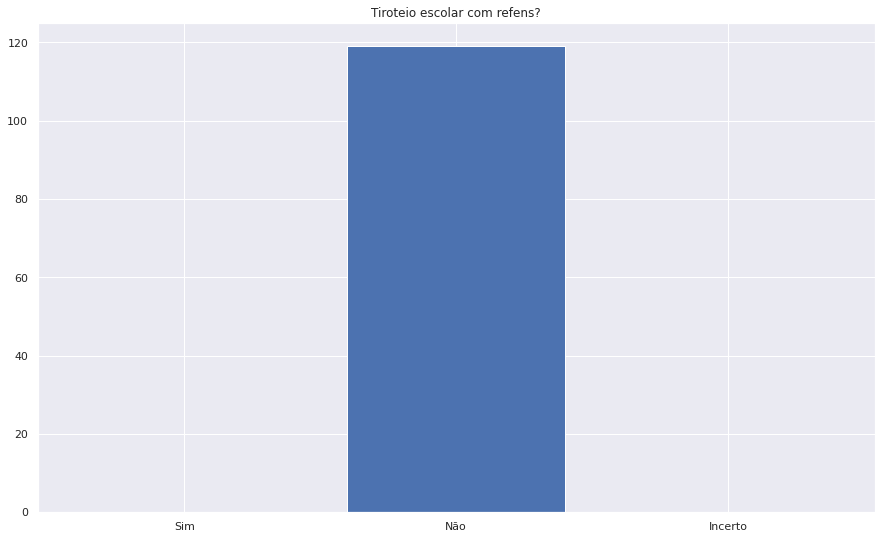

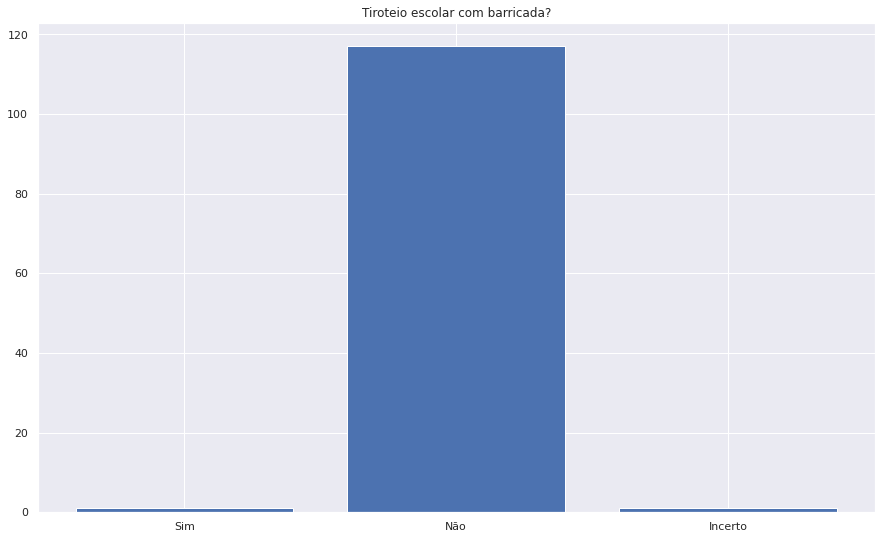

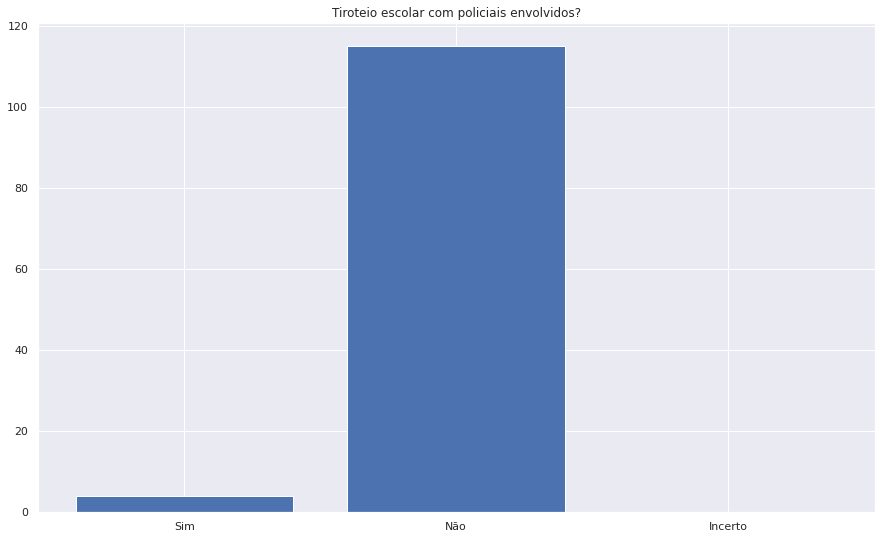

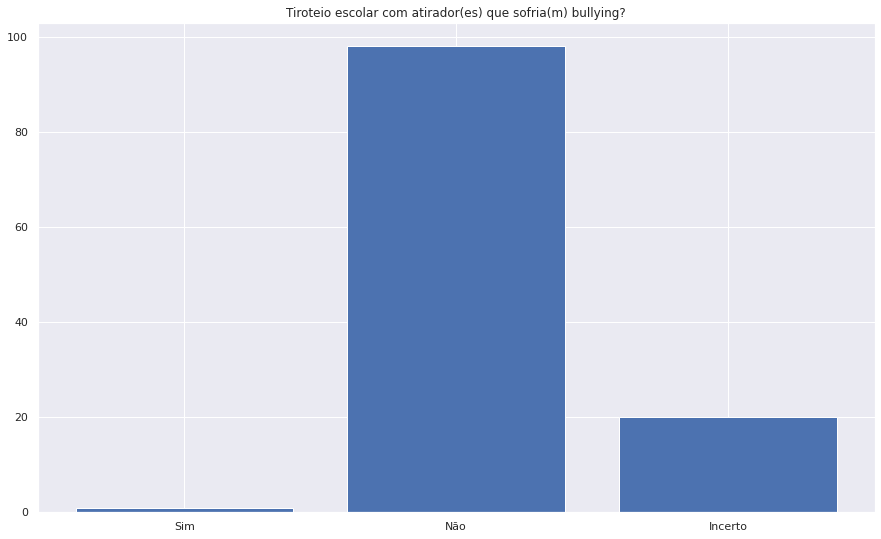

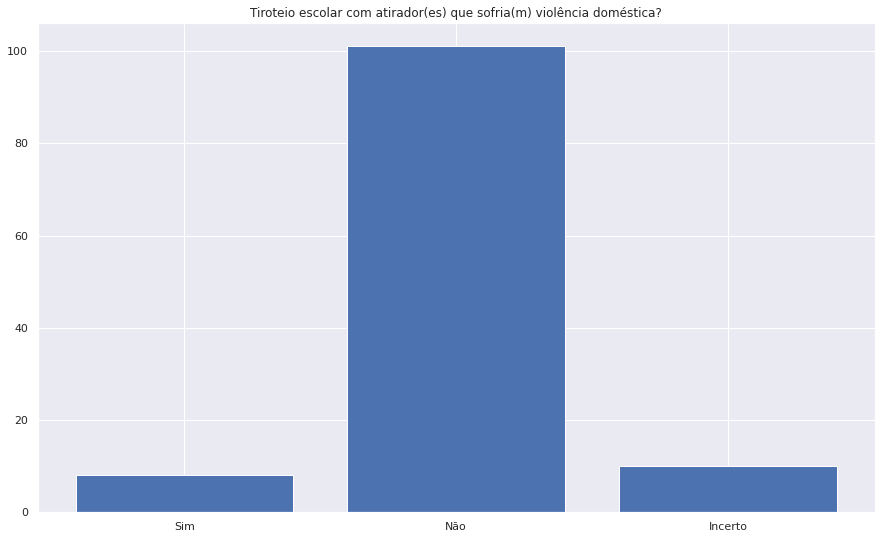

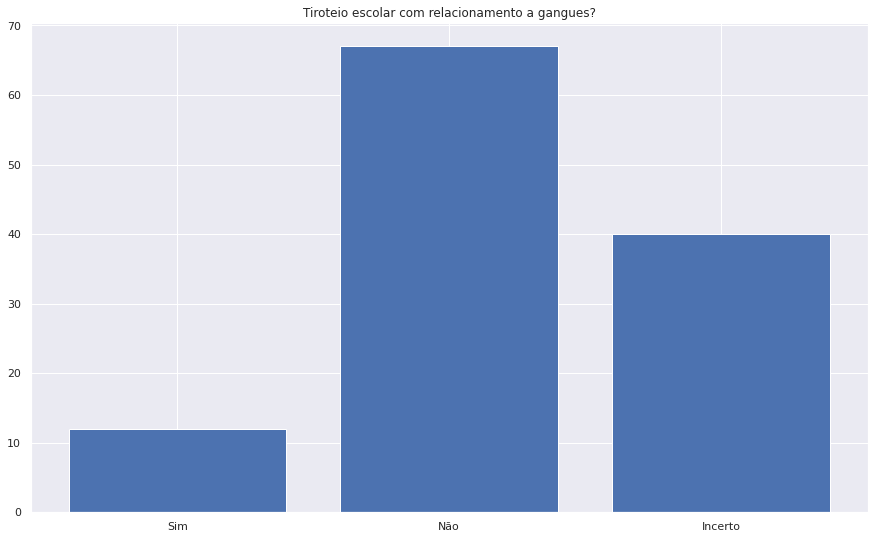

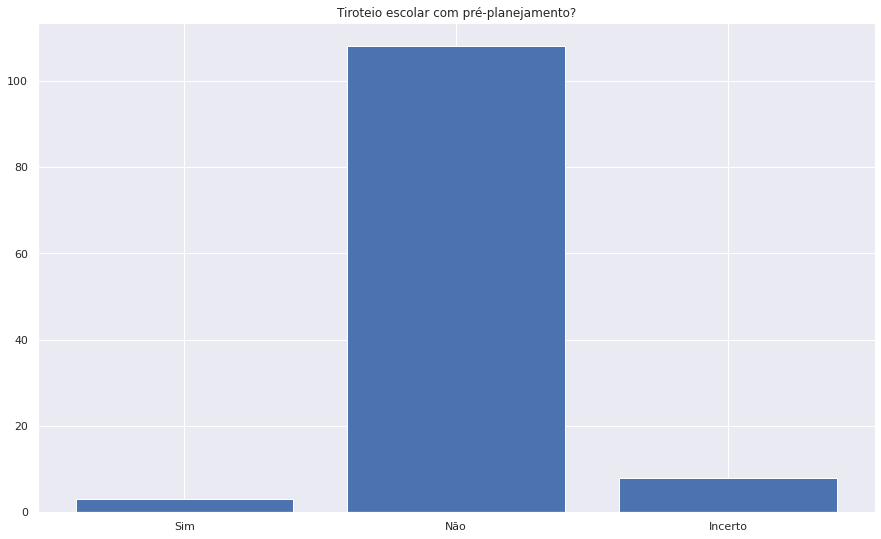

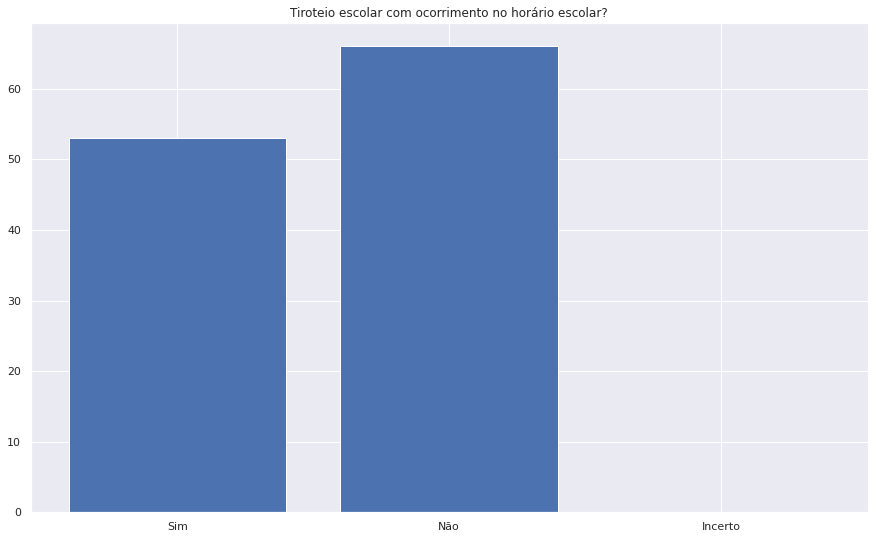

In [ ]:
yearly_incidents = incidents_details.loc[incidents_details['Date'].str.contains("2019-")]

list_possibilities = {
    'Accomplice': 'cumplices',
    'Hostages': 'refens',
    'Barricade': 'barricada',
    'Officer_Involved': 'policiais envolvidos',
    'Bullied': 'atirador(es) que sofria(m) bullying',
    'Domestic_Violence': 'atirador(es) que sofria(m) violência doméstica',
    'Gang_Related': 'relacionamento a gangues',
    'Preplanned': 'pré-planejamento',
    'During_School': 'ocorrimento no horário escolar'
}

for situation in list_possibilities.keys():
  yes = len(yearly_incidents.loc[yearly_incidents[situation] == 'Yes'])
  no = len(yearly_incidents.loc[yearly_incidents[situation] == 'No'])
  unsure = len(yearly_incidents) - yes - no
  sizes = [yes, no, unsure]
  
  plt.title("Tiroteio escolar com " + list_possibilities[situation] + "?")
  plt.bar(['Sim', 'Não', 'Incerto'], sizes)
  plt.show()
  print()

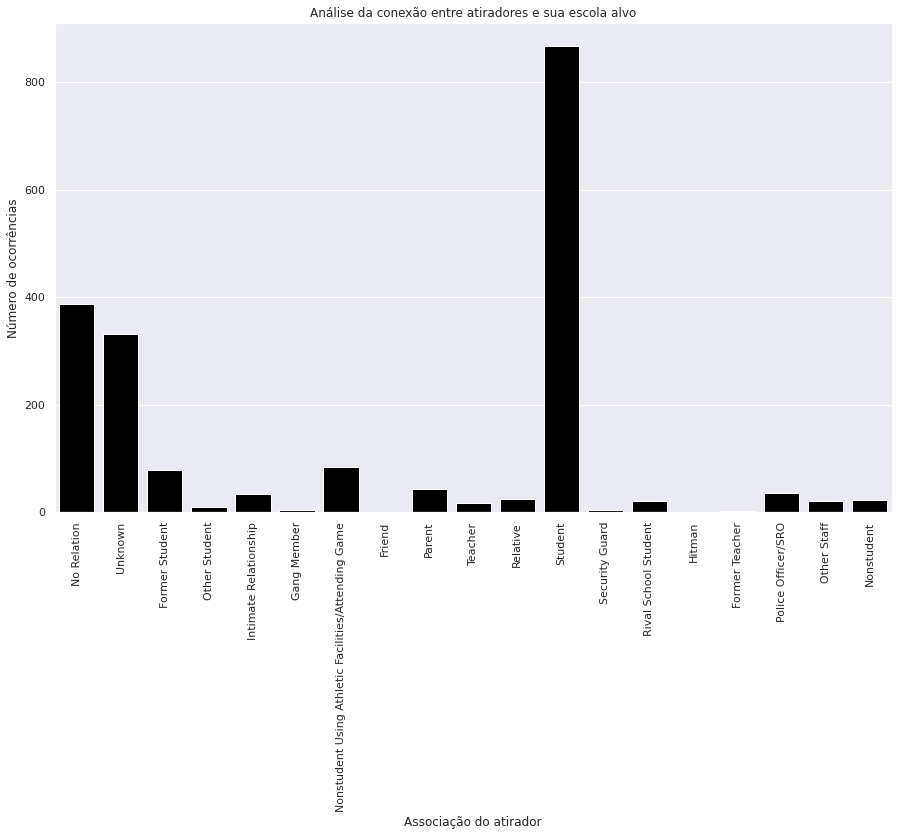

In [ ]:
shooters_affiliations = set(shooter_data['schoolaffiliation'])
shooters_affiliations_counter = []

for shooter_affiliation in shooters_affiliations:
  shooters_affiliations_counter.append(len(shooter_data.loc[shooter_data['schoolaffiliation'] == shooter_affiliation]))

sns.barplot(x = list(shooters_affiliations), y = shooters_affiliations_counter, color='black')

plt.title("Análise da conexão entre atiradores e sua escola alvo")
plt.xlabel('Associação do atirador')
plt.ylabel('Número de ocorrências')
plt.xticks(rotation=90)
plt.show()

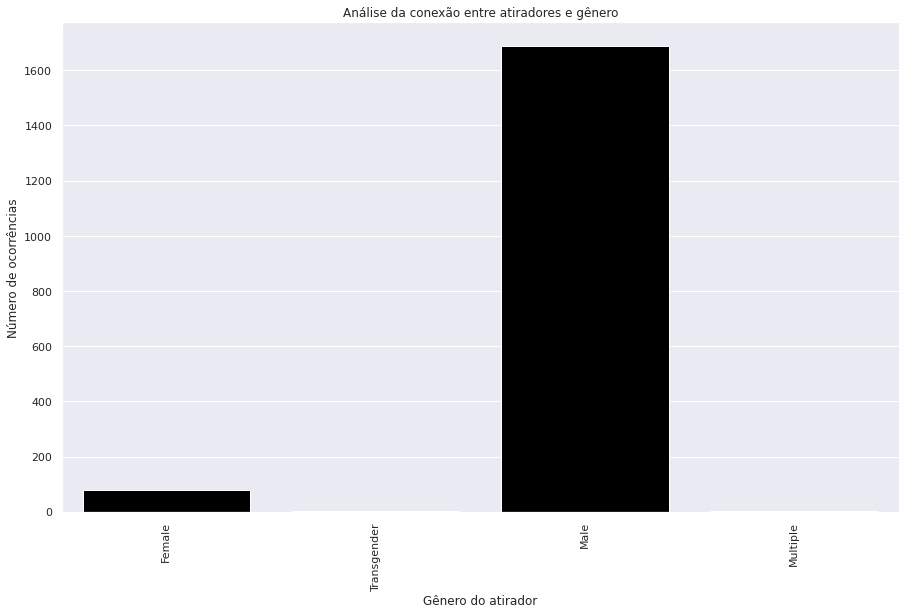

In [ ]:
shooters_genders = set(shooter_data['gender'])
shooters_genders_counter = []

for shooter_gender in shooters_genders:
  shooters_genders_counter.append(len(shooter_data.loc[shooter_data['gender'] == shooter_gender]))

sns.barplot(x = list(shooters_genders), y = shooters_genders_counter, color='black')

plt.title("Análise da conexão entre atiradores e gênero")
plt.xlabel('Gênero do atirador')
plt.ylabel('Número de ocorrências')
plt.xticks(rotation=90)
plt.show()